**-----------------------------------------------------------------------------------------------------------------**

*In this lecture we are going to explore:*

1. Why Use LDA (Latent Dirichlet Allocation) in NLP?
2. How LDA(Latent Dirichlet Allocation) Works?
3. Python implementation of TF-IDF in NLP.

**-----------------------------------------------------------------------------------------------------------------**

# 6.4 LDA

* **Topic Modeling:** Topic modeling is a frequently used approach to discover hidden semantic patterns portrayed by a text corpus and automatically identify topics that exist inside it.

* Topic modeling is a natural language processing (NLP) technique that applies unsupervised learning on large text datasets in order to produce a summary set of terms derived from those documents.

* For example, the words “dog” and “bone” are more likely to appear in documents concerning dogs, whereas “cat” and “meow” are more likely to be found in documents regarding cats. 

* The **LDA algorithm** generates topics, classifying words and documents among these different topics, according to probability distributions.
* **Note:** "Topic" here means just collection of words not any specific term eg; "Entertainment" is not an topic here

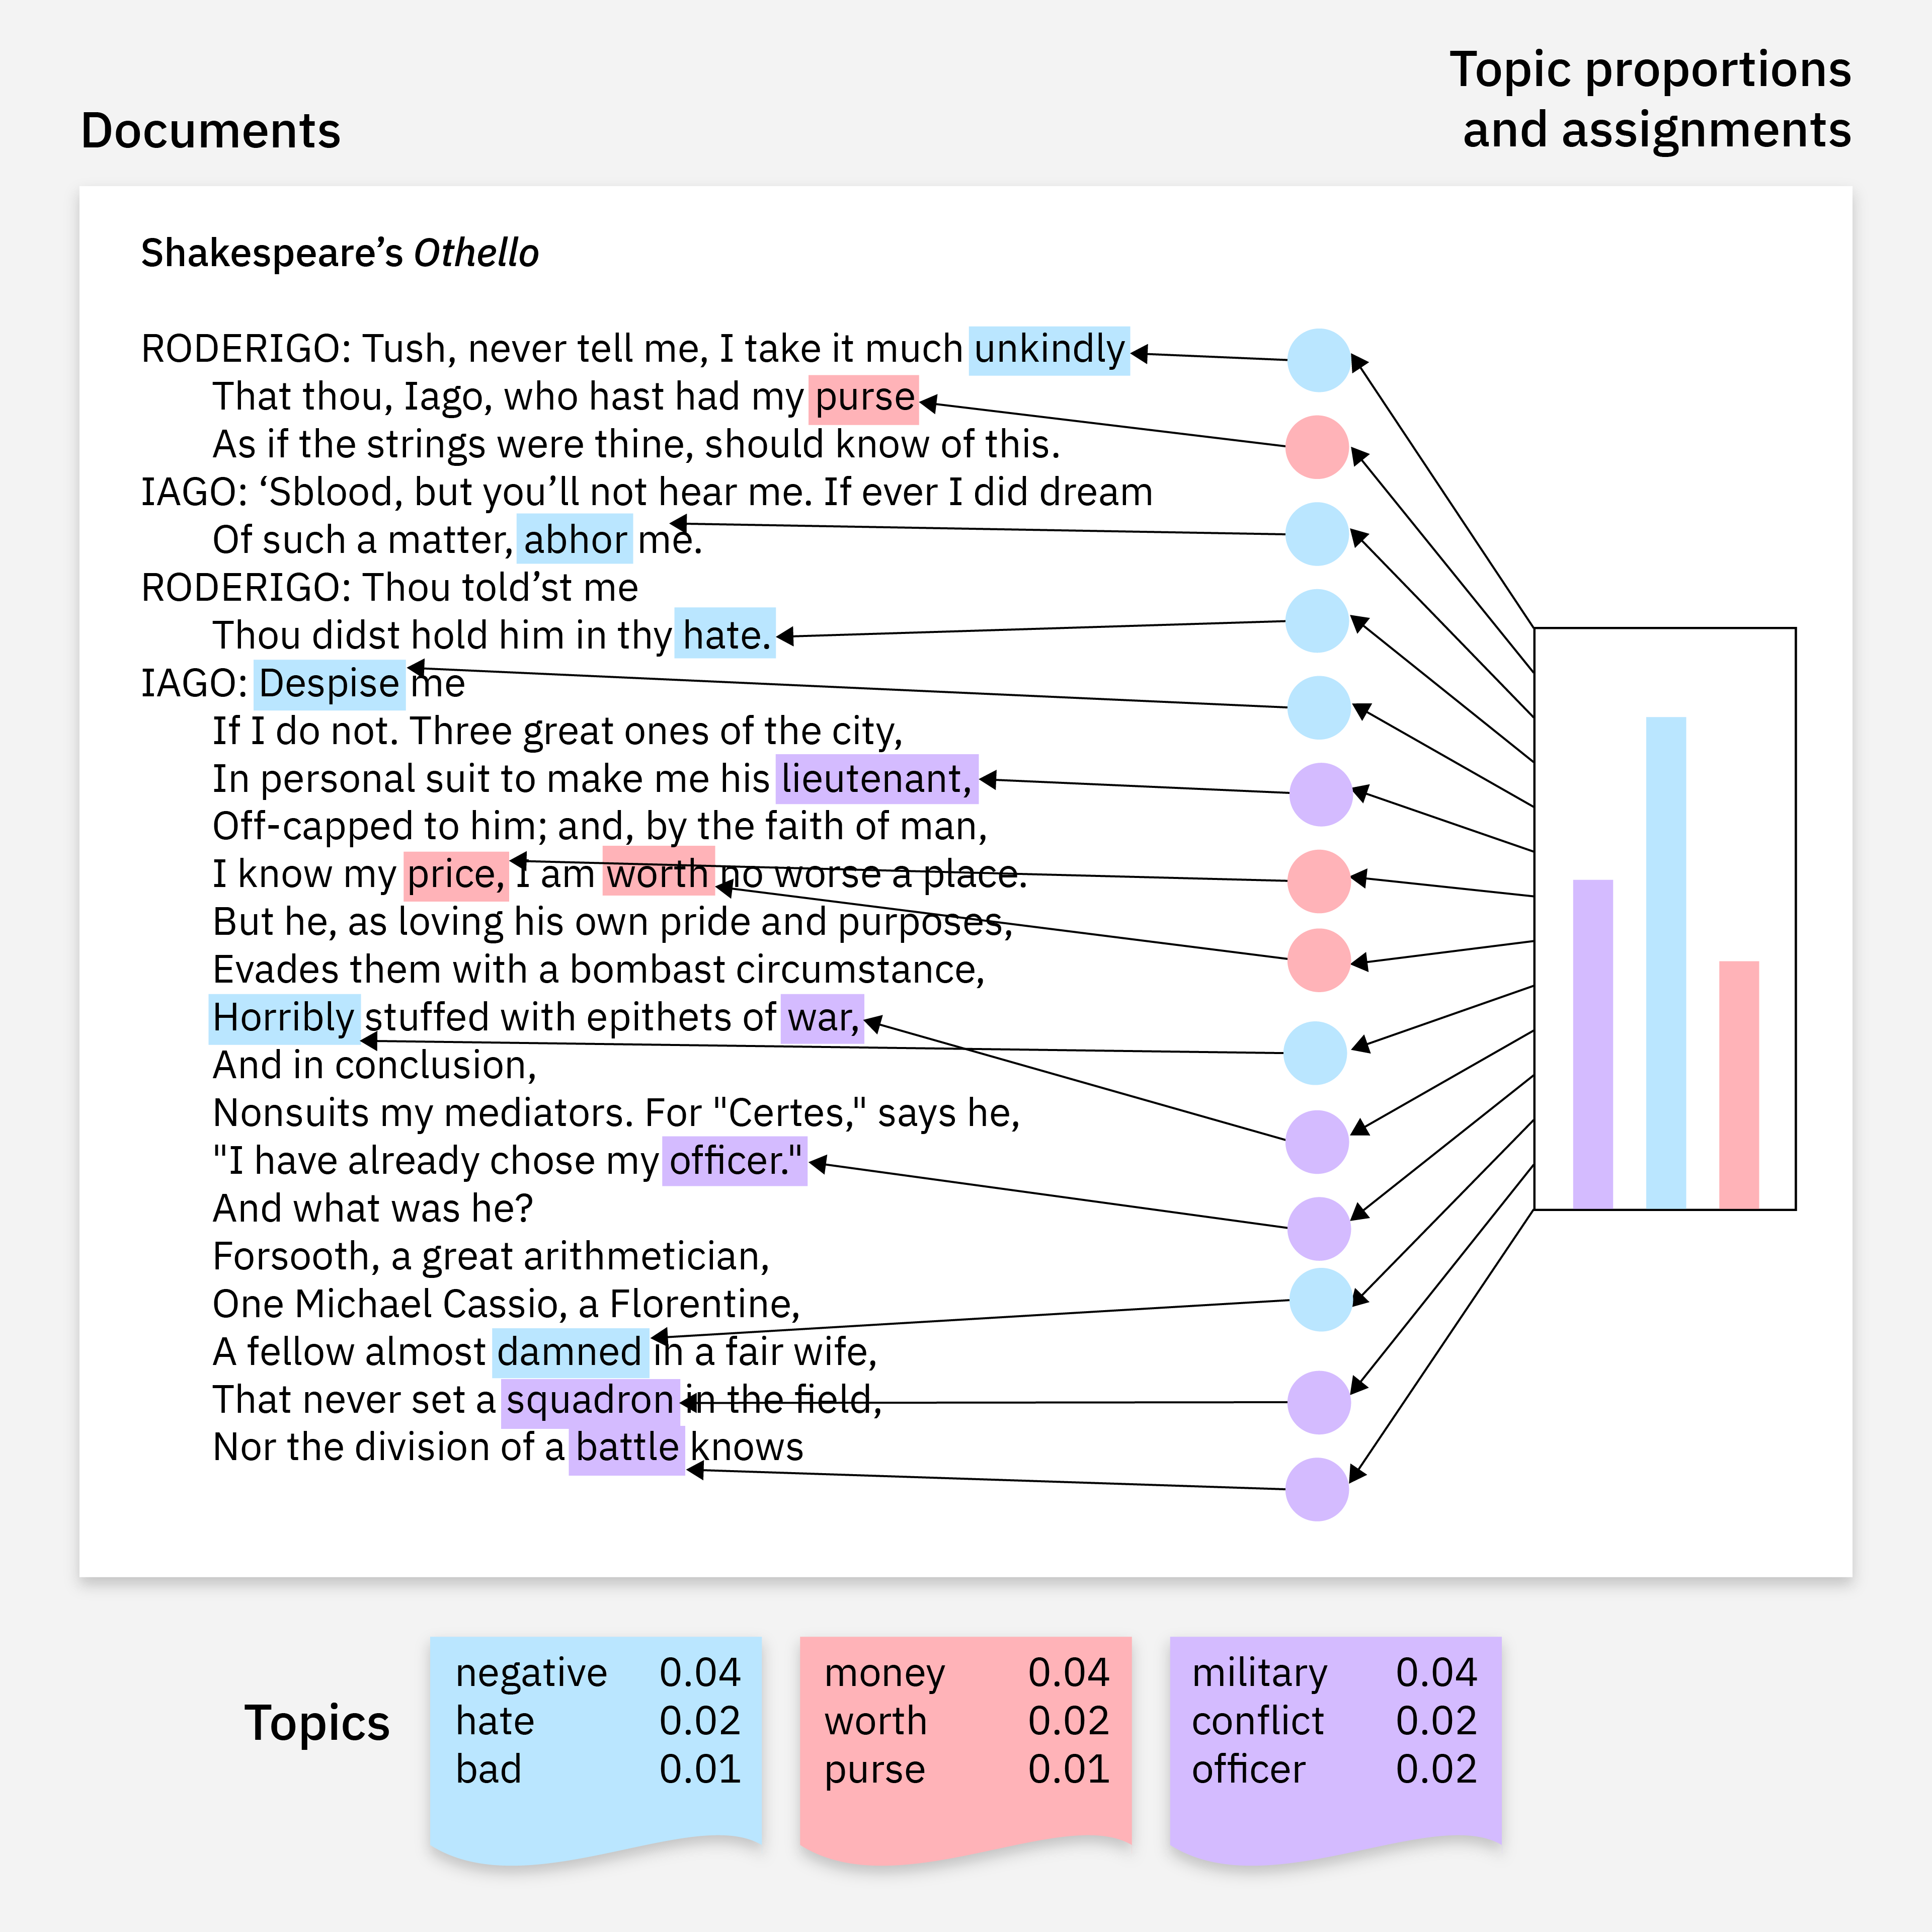

* LDA helps in discovering the main themes or topics in a large collection of documents.

In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import gensim
import gensim.corpora as corpora

### Load Data

In [3]:
data = pd.read_csv("/content/sample_data/news_articles.csv") # data should be in the same folder as your notebook

In [4]:
data.head()

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       100 non-null    int64 
 1   title    100 non-null    object
 2   content  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


### Clean Data

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
# take just the content of the article, lowercase and remove punctuation
articles = data['content'].str.lower().apply(lambda x: re.sub(r"([^\w\s])", "", x))

# stop word removal
en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

# tokenize
articles = articles.apply(lambda x: word_tokenize(x))

# stemming (done for speed as we have a lot of text)
ps = PorterStemmer()
articles = articles.apply(lambda tokens: [ps.stem(token) for token in tokens])

In [11]:
articles

,content
0,"[dr, frank, sack, professor, nutrit, harvard, ..."
1,"[south, carolina, win, duke, surpris, fan, pos..."
2,"[want, get, brief, email, here, good, even, he..."
3,"[banjul, gambia, week, inaugur, anoth, countri..."
4,"[biggest, book, summer, isnt, blockbust, thril..."
...,...
95,"[want, get, brief, email, here, good, even, he..."
96,"[tallinn, estonia, guard, brought, ahm, abdul,..."
97,"[gov, scott, walker, wisconsin, activ, wiscons..."
98,"[social, media, shook, emot, headlin, shout, n..."


### Vectorization

In [12]:
# create dictionary of all words
dictionary = corpora.Dictionary(articles)
print(dictionary)

Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


In [13]:
# vecotize using bag of words into a document term matrix
doc_term = [dictionary.doc2bow(text) for text in articles]

In [14]:
print(doc_term)

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 3), (21, 3), (22, 1), (23, 3), (24, 2), (25, 4), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 2), (49, 1), (50, 2), (51, 2), (52, 1), (53, 1), (54, 2), (55, 1), (56, 2), (57, 6), (58, 1), (59, 1), (60, 1), (61, 4), (62, 2), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 5), (71, 4), (72, 1), (73, 1), (74, 1), (75, 2), (76, 2), (77, 1), (78, 2), (79, 2), (80, 1), (81, 1), (82, 1), (83, 4), (84, 2), (85, 1), (86, 1), (87, 3), (88, 1), (89, 3), (90, 1), (91, 2), (92, 3), (93, 6), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 2), (104, 5), (105, 1), (106, 2), (107, 1), (108, 1), (109, 3), (110, 4)

##### Let's now discuss Latent Dirichlet allocation and exactly how this algorithm works.

Let's take an example from the last lesson.

We have a collection of news articles we want to classify into different topics.

So this could be politics news, sport, news, business news etc..

How do we decide which document is about which topic?

Well, we can look at the words they use.

So for example words such as ball, player, match, game.

If these words appear many times in the document, we can probably take a guess that this article is

going to be about sports news.

Some words are going to be more relevant to the topic, and some words can occur in more than one topic.

So for example, the word crush could be related to traffic news or financial news.

We say that the topic is latent within the document.

We must examine the words within it to discover the topic of that piece of text.

A document can obviously contain words from more than one topic, but we make the assumption that it's

mainly focused on a single topic with only a few words relating to other different topics.

This is our Dirichlet distribution.

So we have an understanding of what we mean by latent topics and our Dirichlet distribution.

LDA then works as an iterative process, where we first specify the number of topics that we want as

k.

The first iteration of the algorithm is where words in the document are randomly assigned to one of

the k topics.

We then move to the second iteration, where we go through each individual word in the document.

We assume that all other words are correctly assigned to a topic, and we try to correct the current

words we're looking at as topic assignment.

LDA corrects the assignment by looking at the proportion of words in the current document assigned to

a topic, and the number of times that this word is assigned to a specific topic in other documents.

### LDA

In [15]:
# specify number of topics
num_topics = 2

In [16]:
# create LDA model
lda_model = gensim.models.LdaModel(corpus=doc_term,
                                   id2word=dictionary,
                                   num_topics=num_topics)

In [19]:
lda_model.print_topics(num_topics=num_topics, num_words=5)

[(0,
  '0.019*"mr" + 0.016*"said" + 0.006*"trump" + 0.005*"one" + 0.005*"state"'),
 (1,
  '0.013*"mr" + 0.012*"said" + 0.005*"trump" + 0.005*"would" + 0.004*"new"')]

#### This shows the top 2 words for each topic and their corresponding weights, which represent the importance of those words in defining the topic.